# Your first convolutional neural network

# imports

In [16]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization, LeakyReLU,ReLU, Dropout, Activation , concatenate , Add
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

# data

In [17]:
NUM_CLASSES = 10

def resnet_block(x,f):

  # First Layer
  y = Conv2D(filters=f, kernel_size=3, strides=1, padding='same')(x)
  y = BatchNormalization()(y)
  y = ReLU()(y)

  # Second layer
  y = Conv2D(filters=f, kernel_size=3, strides=1, padding='same')(y)
  y = BatchNormalization()(y)

  # 1x1 convulation (identity) to x
  if x.shape[-1]!=y.shape[-1]:
    x = Conv2D(filters=f,kernel_size=1,strides=1,padding='same')(x)
    x = BatchNormalization()(x)

  # Adding the input (skipped) to the output
  y = Add()([y, x])
  y = ReLU()(y)

  return y


In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [20]:
x_train[54, 12, 13, 1]

0.36862746

In [21]:
input_layer = Input((32,32,3))

x = resnet_block(input_layer,16)
x = resnet_block(x,32)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 32, 32, 16)           448       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 32, 32, 16)           64        ['conv2d_6[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu_4 (ReLU)              (None, 32, 32, 16)           0         ['batch_normalization_7[

# train

In [23]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
history = model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 12ms/step - loss: 1.3884 - accuracy: 0.5176 - val_loss: 1.0538 - val_accuracy: 0.6287
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9623 - accuracy: 0.6637 - val_loss: 0.9391 - val_accuracy: 0.6722
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7905 - accuracy: 0.7246 - val_loss: 1.1586 - val_accuracy: 0.6091
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6572 - accuracy: 0.7716 - val_loss: 1.0276 - val_accuracy: 0.6460
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5347 - accuracy: 0.8147 - val_loss: 1.0370 - val_accuracy: 0.6613
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4251 - accuracy: 0.8528 - val_loss: 1.0549 - val_accuracy: 0.6724
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3423 - accuracy: 0.8808 - val_loss: 1.2647 -

In [25]:
model.layers[6].get_weights()

[array([1.0315446 , 0.9639609 , 1.1227819 , 1.0814714 , 0.9801922 ,
        0.94278264, 0.9230018 , 1.1182023 , 1.045563  , 0.96796745,
        1.116587  , 1.1265113 , 1.0835037 , 0.9429175 , 0.9858165 ,
        1.0376842 ], dtype=float32),
 array([-0.08051701, -0.03270449,  0.0755472 , -0.06639228, -0.0729265 ,
        -0.11597951, -0.0528877 ,  0.01346477, -0.0299721 , -0.0163172 ,
         0.05436562,  0.02799868, -0.01403299, -0.01409459, -0.06708056,
        -0.00318201], dtype=float32),
 array([ 0.21436031, -0.5193716 , -0.88509893, -0.10153231, -0.49873695,
         0.93727803, -0.35132998, -0.13779272, -0.67020714, -0.19445483,
        -0.24010293, -0.30225107, -0.33475587, -0.17604768, -0.05477376,
        -1.3666633 ], dtype=float32),
 array([0.7230774 , 2.325217  , 1.1225431 , 1.0547111 , 0.5693931 ,
        1.2093    , 0.7754114 , 0.54495925, 1.8001304 , 0.64262235,
        0.7593245 , 0.85850745, 0.8560846 , 1.4522703 , 1.8383747 ,
        1.8519183 ], dtype=float32)]

# analysis

In [26]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 40ms/step - loss: 1.4365 - accuracy: 0.6453


[1.436471700668335, 0.6452999711036682]

In [27]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 3ms/step


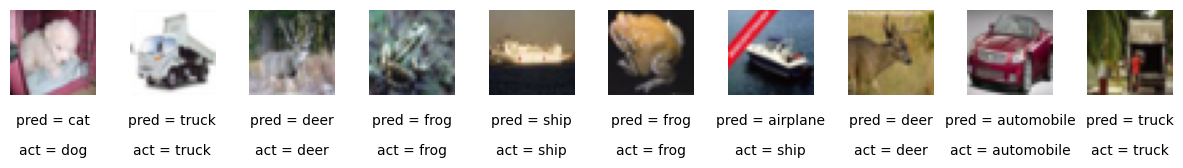

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


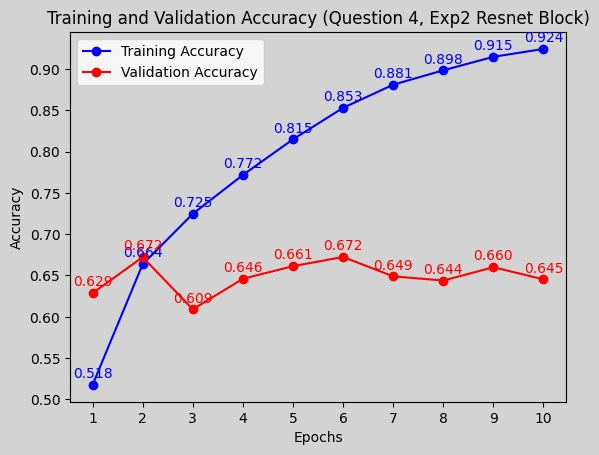

In [29]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy',color='blue',marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color='red',marker='o')

for i, txt in enumerate(train_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], train_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

for i, txt in enumerate(val_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], val_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='red')


plt.title('Training and Validation Accuracy (Question 4, Exp2 Resnet Block)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

In [30]:
import csv

csv_file_path = 'Q4.csv'

with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)

header = rows[0]
new_column = ['Ex2_trainacc','Ex2_valacc']

for column in new_column:
    if column not in header:
        header.append(column)

rows[0] = header

for row, t_acc, v_acc in zip(rows[1:], train_accuracy,val_accuracy ):
    row.extend([t_acc, v_acc])

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

print(f"Accuracy values have been appended to new rows in {csv_file_path}")

Accuracy values have been appended to new rows in Q4.csv
